## Проект e-commerce


### Описание данных:

#### olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей
* customer_id — позаказный идентификатор пользователя
* customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)
* customer_zip_code_prefix —  почтовый индекс пользователя
* customer_city —  город доставки пользователя
* customer_state —  штат доставки пользователя

#### olist_orders_dataset.csv —  таблица заказов
* order_id —  уникальный идентификатор заказа (номер чека)
* customer_id —  позаказный идентификатор пользователя
* order_status —  статус заказа
* order_purchase_timestamp —  время создания заказа
* order_approved_at —  время подтверждения оплаты заказа
* order_delivered_carrier_date —  время передачи заказа в логистическую службу
* order_delivered_customer_date —  время доставки заказа
* order_estimated_delivery_date —  обещанная дата доставки

#### olist_order_items_dataset.csv —  товарные позиции, входящие в заказы
* order_id —  уникальный идентификатор заказа (номер чека)
* order_item_id —  идентификатор товара внутри одного заказа
* product_id —  ид товара (аналог штрихкода)
* seller_id — ид производителя товара
* shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
* price —  цена за единицу товара
* freight_value —  вес товара

#### Уникальные статусы заказов в таблице olist_orders_dataset:
* created —  создан
* approved —  подтверждён
* invoiced —  выставлен счёт
* processing —  в процессе сборки заказа
* shipped —  отгружен со склада
* delivered —  доставлен пользователю
* unavailable —  недоступен
* canceled —  отменён

In [211]:
# импортируем необходимые для работы библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import timedelta
import requests
from urllib.parse import urlencode
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# ссылки на таблицы с данными на ЯндексДиск
customers_dataset = 'https://disk.yandex.ru/d/QXrVDUoQvFhIcg'
orders_data_set = 'https://disk.yandex.ru/d/0zWmh1bYP6REbw'
items_dataset ='https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg'

In [4]:
# создаем функцию для загрузки и получения файла
def yandex_file (public_key):    
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']
    return download_url

In [5]:
# загружаем файлы в датафрейме и присваем переменные
customers = pd.read_csv(yandex_file(customers_dataset))
orders = pd.read_csv(yandex_file(orders_data_set), parse_dates=[3, 4, 5, 6, 7])
items = pd.read_csv(yandex_file(items_dataset))

In [6]:
# теперь посмотрим на структуру и данные в датафрейме
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [10]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


## 1. Сколько пользователей, которые совершили покупку только один раз?

In [12]:
# смотрим какие у нас вообще есть статусы заказов
orders.order_status.value_counts().sum()

99441

Я буду отталкиваться от кого сколько пользователеей совершили одну покупку от статуса доставки. Одна покупка это покупка со статусом  `'delivered'`,так как  товар уже доставлен и получен клиентом. Другие статусы не подходят, потому что товар клиентом не получен

In [13]:
# делаем объединение двух таблиц orders и customers для получения кол-ва уникальных пользователей 
orders_del = orders.merge(customers, how='inner', on='customer_id')
orders_del.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [14]:
orders_del.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [15]:
# в полученном датафрейме оставлялем только заказаы со статусом 'delivered'
orders_del= orders_del.query("order_status == 'delivered'")

In [16]:
# делаем агрегацию для получения кол-ва пользователей с 1 заказом
orders_del.groupby('customer_unique_id', as_index=False) \
    .agg({'order_id': 'count'}) \
    .query("order_id == 1") \
    .value_counts().sum()

90557

Число клиентов с одним заказаом составило: __90557__

## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам?

In [26]:
# посмотри сколько товаров нпо статусу заказов не доставлено
delivered_no = orders.query("order_status != 'delivered'")

In [27]:
delivered_no.shape[0]

2963

У нас получилось 2963 заказов не доставлено

In [ ]:
# изменим формат даты в столбце "order_purchase_timestamp" т.к. нам нужно сделать расчет в разрезе месяца
delivered_no['order_purchase_timestamp'] = delivered_no.order_purchase_timestamp.dt.strftime('%Y-%m')

In [29]:
delivered_no.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07


In [ ]:
# Считаем сколько не было доставлено заказов в месяц по каждой причине

In [32]:
delivered_no_1 = delivered_no.groupby(['order_purchase_timestamp', 'order_status']) \
    .agg({'order_id': 'count'})

In [34]:
#  Расчитываем среднее по каждой причине 
delivered_no_1.groupby("order_status") \
    .agg({'order_id': 'mean'}).round(1)

,order_id
order_status,
approved,1.0
canceled,26.0
created,1.7
invoiced,15.0
processing,15.8
shipped,48.1
unavailable,29.0


Выше мы вывели информацию по всем статусам, но нам интересны заказы со стаусом `canceled` и `unavailable`, потому что при таких статусах можно утверждать, заказ не доставлен.

## 3. По каждому товару определить, в какой день недели товар чаще всего покупается. 

In [55]:
# делаем объединение двух дата фреймов orders и items
top_product = orders.merge(items, on='order_id')
top_product.shape

(112650, 14)

In [56]:
# оставлялем только заказы только со статусом 'delivered'
top_product = top_product.query("order_status == 'delivered'")

In [57]:
top_product.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [58]:
top_product['order_purchase_timestamp'] = pd.to_datetime(top_product.order_purchase_timestamp, format = '%Y-%m')

In [63]:
# приводим столбец к дню недели 
top_product['order_purchase_timestamp'] = top_product['order_purchase_timestamp'].dt.day_name()

In [99]:
top_product_1 = top_product.groupby(['product_id', 'order_purchase_timestamp']) \
                           .agg({'price': 'count'}) \
                           .reset_index()


In [100]:
top_product_1.pivot(index='product_id', columns='order_purchase_timestamp', values='price') \
            .idxmax(axis=1) \
            .to_frame() \
            .reset_index() \
            .rename(columns={0:'top_day_sale'})

,product_id,top_day_sale
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,Friday
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...,...
32211,fff6177642830a9a94a0f2cba5e476d1,Saturday
32212,fff81cc3158d2725c0655ab9ba0f712c,Monday
32213,fff9553ac224cec9d15d49f5a263411f,Friday
32214,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday


## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [86]:
# возьмем датафрейм из первого задания, где заказы со статусом 'delivered' и переприсвоем его на новую переменную
avg_purchase = orders_del

In [92]:
avg_purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96478 non-null  object        
 1   customer_id                    96478 non-null  object        
 2   order_status                   96478 non-null  object        
 3   order_purchase_timestamp       96478 non-null  datetime64[ns]
 4   order_approved_at              96464 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96476 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96478 non-null  datetime64[ns]
 8   customer_unique_id             96478 non-null  object        
 9   customer_zip_code_prefix       96478 non-null  int64         
 10  customer_city                  96478 non-null  object        
 11  customer_state 

In [95]:
# делаем агрегацию данных, смотрим сколько заказов у каждого пользователя 
avg_purchase = avg_purchase.groupby(['order_purchase_timestamp', 'customer_unique_id'], as_index=False) \
                          .agg({'order_id': 'count'}) \
                          .rename(columns={'order_id': 'order_month'})

In [97]:
# теперь добавим новый столбец сколько недель в месяце
avg_purchase['weeks'] = (avg_purchase['order_purchase_timestamp'].dt.daysinmonth) / 7

In [98]:
avg_purchase.head()

,order_purchase_timestamp,customer_unique_id,order_month,weeks
0,2016-09-15 12:16:38,830d5b7aaa3b6f1e9ad63703bec97d23,1,4.285714
1,2016-10-03 09:44:50,32ea3bdedab835c3aa6cb68ce66565ef,1,4.428571
2,2016-10-03 16:56:50,2f64e403852e6893ae37485d5fcacdaf,1,4.428571
3,2016-10-03 21:13:36,61db744d2f835035a5625b59350c6b63,1,4.428571
4,2016-10-03 22:06:03,8d3a54507421dbd2ce0a1d58046826e0,1,4.428571


In [102]:
# расчитаем сколько приходилось в среднем покупок у каждого пользователя
avg_purchase['orders_by_week'] = avg_purchase.order_month / avg_purchase.weeks
avg_purchase.head()

,order_purchase_timestamp,customer_unique_id,order_month,weeks,orders_by_week
0,2016-09-15 12:16:38,830d5b7aaa3b6f1e9ad63703bec97d23,1,4.285714,0.233333
1,2016-10-03 09:44:50,32ea3bdedab835c3aa6cb68ce66565ef,1,4.428571,0.225806
2,2016-10-03 16:56:50,2f64e403852e6893ae37485d5fcacdaf,1,4.428571,0.225806
3,2016-10-03 21:13:36,61db744d2f835035a5625b59350c6b63,1,4.428571,0.225806
4,2016-10-03 22:06:03,8d3a54507421dbd2ce0a1d58046826e0,1,4.428571,0.225806


In [105]:
# отсортируем данные и оставим только те столбцы которые нам нужны
avg_purchase[['customer_unique_id', 'orders_by_week']].head()

,customer_unique_id,orders_by_week
0,830d5b7aaa3b6f1e9ad63703bec97d23,0.233333
1,32ea3bdedab835c3aa6cb68ce66565ef,0.225806
2,2f64e403852e6893ae37485d5fcacdaf,0.225806
3,61db744d2f835035a5625b59350c6b63,0.225806
4,8d3a54507421dbd2ce0a1d58046826e0,0.225806


## 5.  Когортный анализ пользователей. Когорта с самым высоким retention на 3й месяц.

In [191]:
# сделаем новый датафрейм для задания
cohorts = orders.merge(customers, how='left', on='customer_id')
# привидем столбец к формату год месяц
cohorts['order_purchase_timestamp'] =cohorts.order_purchase_timestamp.dt.to_period("M")
cohorts.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [192]:
#создаем таблицу для когортного анализа 
cohorts = cohorts[['customer_unique_id', 'customer_id', 'order_purchase_timestamp']]
cohorts.head()

,customer_unique_id,customer_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,9ef432eb6251297304e76186b10a928d,2017-10
1,af07308b275d755c9edb36a90c618231,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,41ce2a54c0b03bf3443c3d931a367089,2018-08
3,7c142cf63193a1473d2e66489a9ae977,f88197465ea7920adcdbec7375364d82,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02


In [193]:
#создадим новую колонку с месяцем первой покупки по каждому клиенту
cohorts['first_order_date'] = cohorts.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min')

In [186]:
cohorts.head()

,customer_unique_id,customer_id,order_purchase_timestamp,first_order_date
0,7c396fd4830fd04220f754e42b4e5bff,9ef432eb6251297304e76186b10a928d,2017-10,2017-09
1,af07308b275d755c9edb36a90c618231,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,41ce2a54c0b03bf3443c3d931a367089,2018-08,2018-08
3,7c142cf63193a1473d2e66489a9ae977,f88197465ea7920adcdbec7375364d82,2017-11,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02,2018-02


In [194]:
# оставлялем период который нам нужен для аналица
cohorts = cohorts.query("first_order_date >= '2017-01' & first_order_date <= '2017-12'")

In [195]:
cohorts = cohorts.groupby(['first_order_date', 'order_purchase_timestamp'], as_index=False)\
        .agg({'customer_unique_id': 'nunique'})
cohorts.head()

,first_order_date,order_purchase_timestamp,customer_unique_id
0,2017-01,2017-01,764
1,2017-01,2017-02,3
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3


In [197]:
#Функция для создания колонки с когортным периодом
def cohort_period(cohorts):
    cohorts['cohort_period'] = np.arange(len(cohorts))
    return cohorts

cohorts = cohorts.groupby('first_order_date').apply(cohort_period)
cohorts.head(5)

,first_order_date,order_purchase_timestamp,customer_unique_id,cohort_period
0,2017-01,2017-01,764,0
1,2017-01,2017-02,3,1
2,2017-01,2017-03,2,2
3,2017-01,2017-04,1,3
4,2017-01,2017-05,3,4


In [198]:
# Делаем сводную талицу с помощью pivot 
cohorts = cohorts.pivot(columns='cohort_period', index = 'first_order_date',values='customer_unique_id')
cohorts

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
first_order_date,,,,,,,,,,,,,,,,,,
2017-01,764.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,3.0,1.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1752.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0
2017-03,2636.0,13.0,10.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0
2017-04,2352.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN
2017-05,3596.0,18.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,9.0,12.0,9.0,1.0,7.0,9.0,NaN,NaN
2017-06,3139.0,15.0,11.0,13.0,8.0,12.0,12.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN
2017-07,3894.0,20.0,14.0,10.0,11.0,8.0,12.0,4.0,7.0,10.0,9.0,12.0,5.0,10.0,NaN,NaN,NaN,NaN
2017-08,4184.0,29.0,14.0,11.0,15.0,22.0,12.0,11.0,6.0,6.0,10.0,8.0,4.0,NaN,NaN,NaN,NaN,NaN
2017-09,4130.0,28.0,22.0,12.0,19.0,9.0,9.0,10.0,12.0,7.0,11.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
#Находим когорту с самым высоким retention
highest_retention_cohort = cohorts.divide(cohorts.iloc[:,0], axis=0).mul(100).round(2)
highest_retention_cohort.idxmax()[3]

Period('2017-06', 'M')

Получается, что максимальное значение retention на 3 месяц в когорте 2017-06. Построим heatmap, чтобы было визуально понятно

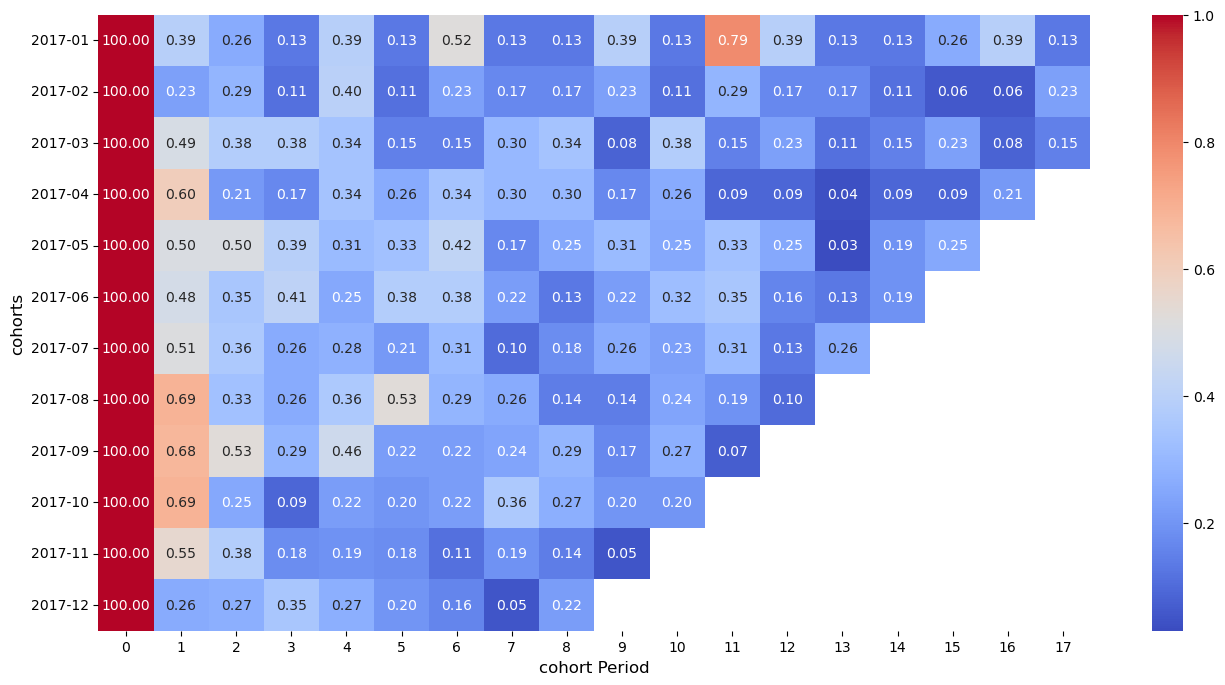

In [206]:
# строим heatmap 
plt.figure(figsize=(16,8))
ax = sns.heatmap(highest_retention_cohort, vmax=1, annot=True, fmt='.2f', cmap='coolwarm')
plt.xlabel('сohort Period',size= 12)
plt.ylabel('сohorts', size= 12)
plt.show()

## 6. RFM-сегментация пользователей

In [207]:
# делаем общий датафрейм из трех таблиц
rfm = customers.merge(orders, on='customer_id')
rfm = rfm.merge(items)[['customer_unique_id', 'price', 'order_purchase_timestamp', 'order_id', 'order_status']]
rfm = rfm.query("order_status == 'delivered'")

In [208]:
rfm.head()

,customer_unique_id,price,order_purchase_timestamp,order_id,order_status
0,861eff4711a542e4b93843c6dd7febb0,124.99,2017-05-16 15:05:35,00e7ee1b050b8499577073aeb2a297a1,delivered
1,290c77bc529b7ac935b93aa66c333dc3,289.00,2018-01-12 20:48:24,29150127e6685892b6eab3eec79f59c7,delivered
2,060e732b5b29e8181a18229c7b0b2b5e,139.94,2018-05-19 16:07:45,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered
3,259dac757896d24d7702b9acbbff3f3c,149.94,2018-03-13 16:06:38,951670f92359f4fe4a63112aa7306eba,delivered
4,345ecd01c38d18a9036ed96c73b8d066,230.00,2018-07-29 09:51:30,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered


In [ ]:
Подсчет показателя Recency. В качестве текущей даты возьмем следующий день после дня последней покупки

In [213]:
# Найдем текущую дату от которой будет рассчитываться время с последней покупки. 
# возьмем дату самой последней покупки + 1 день
date_max = rfm.order_purchase_timestamp.max() + timedelta(1)
date_max

Timestamp('2018-08-30 15:00:37')

Всё готово, приступаем к расчетам RFM-метрики:

- _**Recency**_ - этот параметр показывает, когда клиент сделал последнюю покупку.
- _**Frequency**_ -  этот параметр отражает количество покупок, сделанных клиентом за определенный период времени. 
- _**Monetary**_ -  этот параметр отражает общую сумму денег, которые клиент потратил на покупки.

Расчитываем показатель _**Recency**_

In [215]:
# Определяем какая последняя дата покупки была у каждого пользователя
recency = rfm.groupby('customer_unique_id', as_index=False)\
    .agg({'order_purchase_timestamp':'max'})
recency.head()

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [ ]:
# Добавим новый столбец в котором укажем сколько прошло дней с последней покупки

In [219]:
#Создание нового столбца с количеством дней с последней покупки
recency['recency'] = date_max - recency.order_purchase_timestamp
recency['recency'] = recency['recency'].dt.days
recency.head()

,customer_unique_id,order_purchase_timestamp,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,115
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,537
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,321
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,288


Делаем подсчет _**Frequency**_ 

In [220]:
# Считаем количество уникальных заказов для каждого пользователя
frequency = rfm.groupby('customer_unique_id', as_index=False) \
    .agg({'order_id':pd.Series.nunique}) \
    .rename(columns={'order_id':'frequency'})
frequency.head()

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


Рассчитываем показатель _**Monetary**_

In [222]:
# Расчитываем сумму за каждый заказ
monetary = rfm.groupby(['customer_unique_id'], as_index=False)\
    .agg({'price':'sum'})\
    .rename(columns={'price':'monetary'})
monetary.head()

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00


In [223]:
# Объеденяем все три метрики в один датафрейм
rfm = recency[['customer_unique_id', 'recency']]\
        .merge(frequency, on='customer_unique_id')\
        .merge(monetary, on='customer_unique_id')
rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
2,0000f46a3911fa3c0805444483337064,537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00


In [224]:
#Определение квантилей каждой метрики и разобьем их на 4 группы
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.25, .5, .75])
quintiles

,recency,frequency,monetary
0.25,114.0,1.0,47.6500
0.50,219.0,1.0,89.7300
0.75,346.0,1.0,154.7375


На основании полученный данных мы видим, что квантиль по _**Frequency_** равен 1 и является неинформативным, так как бОльшая часть покупателей совершили всего одну покупку. Попробуем разделить клиентов по   _**Frequency_** в ручную на следующие группы:

- 1 группа - сделали 1 покупку
- 2 группа - сделали 2 покупки 
- 3 группа - сделали 3 покупки
- 4 группа - сделали более 3-х покупок
   

In [225]:
# Пишем функции для присвоения рангов каждому покупателю по каждой метрики recency, frequency и monetary
def R(recency):
    if recency <= quintiles.recency[0.25]:
        return 4
    elif recency <= quintiles.recency[0.5]:
        return 3
    elif recency <= quintiles.recency[0.75]:
        return 2
    else:
        return 1
    
def F(frequency):
    if frequency == 1:
        return 1
    elif frequency == 2:
        return 2
    elif frequency == 3:
        return 3
    else:
        return 4
    
def M(monetary):
    if monetary <= quintiles.monetary[0.25]:
        return 1
    elif monetary <= quintiles.monetary[0.5]:
        return 2
    elif monetary <= quintiles.monetary[0.75]:
        return 3
    else:
        return 4

In [226]:
# Созданием столбцы с рангами по метрикам
rfm['R'] = rfm.recency.apply(R)
rfm['F'] = rfm.frequency.apply(F)
rfm['M'] = rfm.monetary.apply(M)

In [228]:
rfm.head(10)

,customer_unique_id,recency,frequency,monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,3,1,1
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,4
5,0004bd2a26a76fe21f786e4fbd80607f,146,1,154.00,3,1,3
6,00050ab1314c0e55a6ca13cf7181fecf,132,1,27.99,3,1,1
7,00053a61a98854899e70ed204dd4bafe,183,1,382.00,3,1,4
8,0005e1862207bf6ccc02e4228effd9a0,543,1,135.00,1,1,3
9,0005ef4cd20d2893f0d9fbd94d3c0d97,170,1,104.90,3,1,3


In [229]:
# Добавляем новый столбец с метрикой RFM
rfm = rfm.assign(RFM = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str))

In [230]:
 rfm.head(10)

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,3,413
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,4,214
5,0004bd2a26a76fe21f786e4fbd80607f,146,1,154.00,3,1,3,313
6,00050ab1314c0e55a6ca13cf7181fecf,132,1,27.99,3,1,1,311
7,00053a61a98854899e70ed204dd4bafe,183,1,382.00,3,1,4,314
8,0005e1862207bf6ccc02e4228effd9a0,543,1,135.00,1,1,3,113
9,0005ef4cd20d2893f0d9fbd94d3c0d97,170,1,104.90,3,1,3,313


In [231]:
# Смотрим сколько у нас получилось сегментов по RFM
rfm.RFM.nunique()

51

У нас полууучился 51 сегмент это очень большой объем для ручной проверки. Считаю, что здесь будет правильнее разбить клиентов на несколько сегментов по показателям RFM:
* Premium клиенты (очень ценные клиенты) - покупают на большие суммы, часто и последняя покупка была не так давно (R-score 3-4; F-score 3-4; M-score 2-4)
* Постоянные - стабильно покупают и возвращаются периодически (R-score 3-4; F-score 1-2; M-score 3-4)
* Новые - купили недавно несколько покупок и на небольшие суммы(R-score 3-4; F-score 1-2; M-score 1-2)
* Спящие - ранее совершали покупки, но с момента покупки прошло много вермени (R-score 1-2; F-score 2-4; M-score 1-4)
* Утраченные  - очень давно совершили покупки (R-score 1-2; F-score 1; M-score 1-4)


In [311]:

segments = {
    r'[3-4][3-4][2-4]': 'Premium',
    r'[3-4][1-2][3-4]': 'Постоянные',
    r'[3-4][1-2][1-2]': 'Новые',
    r'[1-2][2-4][1-4]': 'Спящие',
    r'[1-2]1[1-4]': 'Утраченные'}
rfm['segment'] = rfm['RFM'].replace(segments, regex=True)
rfm.head(10)

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,3,413,Постоянные
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,3,1,1,311,Новые
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,2,112,Утраченные
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,1,1,211,Утраченные
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,4,214,Утраченные
5,0004bd2a26a76fe21f786e4fbd80607f,146,1,154.00,3,1,3,313,Постоянные
6,00050ab1314c0e55a6ca13cf7181fecf,132,1,27.99,3,1,1,311,Новые
7,00053a61a98854899e70ed204dd4bafe,183,1,382.00,3,1,4,314,Постоянные
8,0005e1862207bf6ccc02e4228effd9a0,543,1,135.00,1,1,3,113,Утраченные
9,0005ef4cd20d2893f0d9fbd94d3c0d97,170,1,104.90,3,1,3,313,Постоянные


In [309]:
rfm_segment= rfm.groupby('segment', as_index=False)\
                    .agg({'customer_unique_id':'count'})\
                    .rename(columns={'customer_unique_id':'customers_count'})
rfm_segment

,segment,customers_count
0,Premium,142
1,Новые,23165
2,Постоянные,23540
3,Потерянные,45259
4,Спящие,1252


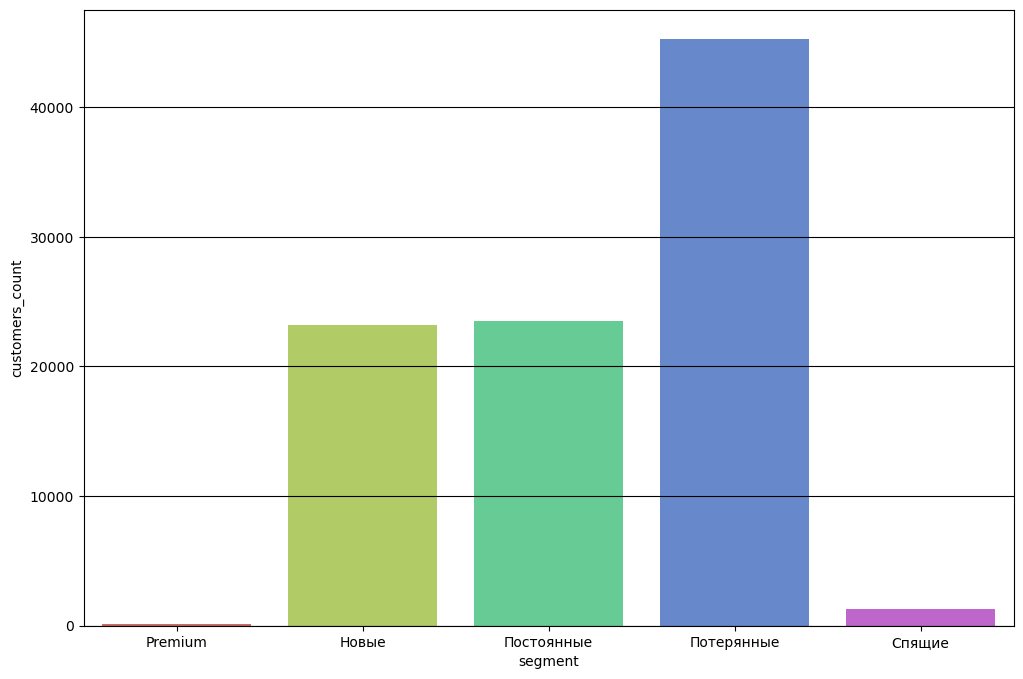

In [312]:
# смотрим на график что у нас получилось)
plt.figure(figsize=(12,8))
plt.grid(color='black')
ax = sns.barplot(data=rfm_segment, palette='hls', x='segment', y='customers_count')